# Part 1 Tensor Basics



In [78]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices("GPU")

2.4.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [79]:
#Single Scaler
t1 = tf.constant([4,2], dtype = tf.float32)#Rank 1 
print(t1)

tf.Tensor([4. 2.], shape=(2,), dtype=float32)


In [80]:
t2 = tf.constant([[4,5,6],[4,5,6]], dtype = tf.float32)#Rank 2 
print(t2)

tf.Tensor(
[[4. 5. 6.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [81]:
t3 = tf.ones((3,3))
print(t3)

t4 = tf.zeros((3,3))
print(t4)

t5 = tf.eye(3)
print(t5)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [82]:
t6 = tf.random.normal((3, 3), mean = 0, stddev = 1)
print(t6)

t7 = tf.random.uniform((3, 3), minval = 0, maxval = 1)
print(t7)

tf.Tensor(
[[-0.027  0.549 -1.342]
 [-0.268  0.302 -0.393]
 [ 0.485 -0.497  0.21 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.627 0.124 0.414]
 [0.519 0.401 0.303]
 [0.016 0.988 0.986]], shape=(3, 3), dtype=float32)


In [83]:
t8 = tf.range(10)
print(t8)

t9 = tf.cast(t8, dtype = tf.float32)
print(t9)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(10,), dtype=float32)


In [84]:
a = tf.constant([5,6,7])
b = tf.constant([1,2,3])
z = tf.add(a,b)
x = tf.subtract(a,b)
m = tf.multiply(a,b)
t = tf.tensordot(a,b, axes = 1)
g = tf.tensordot(a,b, axes = 0)
print(z, x, m)
print(t,g)

tf.Tensor([ 6  8 10], shape=(3,), dtype=int32) tf.Tensor([4 4 4], shape=(3,), dtype=int32) tf.Tensor([ 5 12 21], shape=(3,), dtype=int32)
tf.Tensor(38, shape=(), dtype=int32) tf.Tensor(
[[ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]], shape=(3, 3), dtype=int32)


In [85]:
a = tf.constant([[5,6,7], [5,6,7]])
b = tf.constant([[1,2], [5,6], [2,3]])
print(tf.matmul(a,b)) #matrix çarpımı


tf.Tensor(
[[49 67]
 [49 67]], shape=(2, 2), dtype=int32)


In [86]:
x = tf.random.normal((2,3))
print(x)
x = tf.reshape(x, (3,2))
print(x)

tf.Tensor(
[[ 0.608  0.734 -0.651]
 [-0.805 -1.045  0.779]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 0.608  0.734]
 [-0.651 -0.805]
 [-1.045  0.779]], shape=(3, 2), dtype=float32)


In [87]:
x = tf.reshape(x, (-1,3))#-1 burada kod tamamlasın demek
print(x)

tf.Tensor(
[[ 0.608  0.734 -0.651]
 [-0.805 -1.045  0.779]], shape=(2, 3), dtype=float32)


In [88]:
x = tf.random.normal((2,3))
x = x.numpy()
print(x)

[[0.2   0.38  0.736]
 [1.391 0.103 1.462]]


In [89]:
x = tf.convert_to_tensor(x)
print(x)

tf.Tensor(
[[0.2   0.38  0.736]
 [1.391 0.103 1.462]], shape=(2, 3), dtype=float32)


In [90]:
x = tf.Variable([3,2,1])#model parametreleri tutmak için kullanılır
print(x)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([3, 2, 1])>


# Part 2 Neural Net


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [92]:
#Load Dataset
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [93]:
#Normalize
x_train, x_test = x_train / 255, x_test / 255

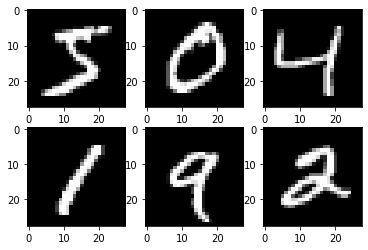

In [94]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap = 'gray')
plt.show();

In [95]:
#Model
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10),
])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape = (28,28))) #teker teker katman ekleme

In [97]:
#Loss and Optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)#ağımızın en son kısmında fonksiyon eksikse 
optim = keras.optimizers.Adam(lr = 0.001)
metrics = ["accuracy"]

model.compile(loss = loss, optimizer = optim, metrics = metrics)

In [98]:
#Training
batch_size = 64
epochs = 5
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = True, verbose = 2)

Epoch 1/5
938/938 - 4s - loss: 0.2953 - accuracy: 0.9167
Epoch 2/5
938/938 - 5s - loss: 0.1329 - accuracy: 0.9612
Epoch 3/5
938/938 - 3s - loss: 0.0914 - accuracy: 0.9733
Epoch 4/5
938/938 - 5s - loss: 0.0703 - accuracy: 0.9790
Epoch 5/5
938/938 - 4s - loss: 0.0548 - accuracy: 0.9837


In [99]:
#Evaluate
model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

157/157 - 1s - loss: 0.0764 - accuracy: 0.9771


[0.07635236531496048, 0.9771000146865845]

In [100]:
#predictions option 1
probility_model = keras.models.Sequential([
                  model,
                  keras.layers.Softmax()
])

predictions = probility_model(x_test)
pred = predictions[0]
label = np.argmax(pred)
print(label)

7


In [101]:
#predictions option 2
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred = predictions[0]
label = np.argmax(pred)
print(label)

7


In [102]:
#predictions option 3
predictions = model.predict(x_test, batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred = predictions[0]
label = np.argmax(pred)
print(label)

7


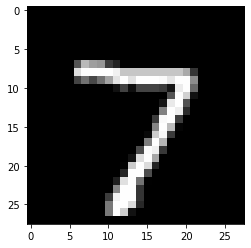

In [103]:
plt.imshow(x_test[0], cmap = 'gray')

# Part 3 Linear Regression

In [104]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision = 3, suppress = True)

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [106]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [107]:
dataset = dataset.dropna()
dataset.shape

(392, 8)

In [108]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1) * 1
dataset['Europe'] = (origin == 2) * 1
dataset['Japan'] = (origin == 3) * 1
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [109]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [110]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [111]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

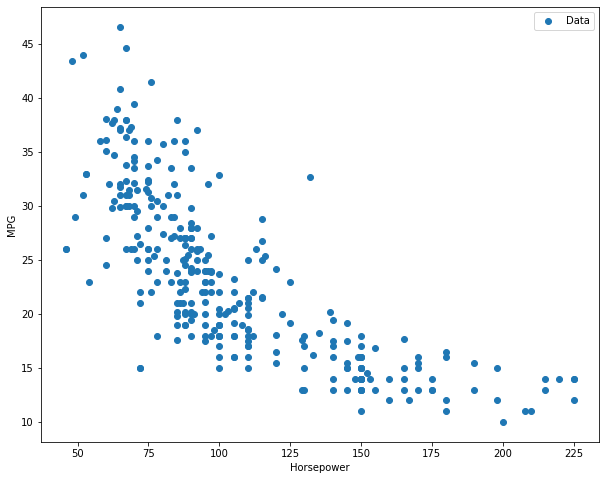

In [112]:
plot('Horsepower')

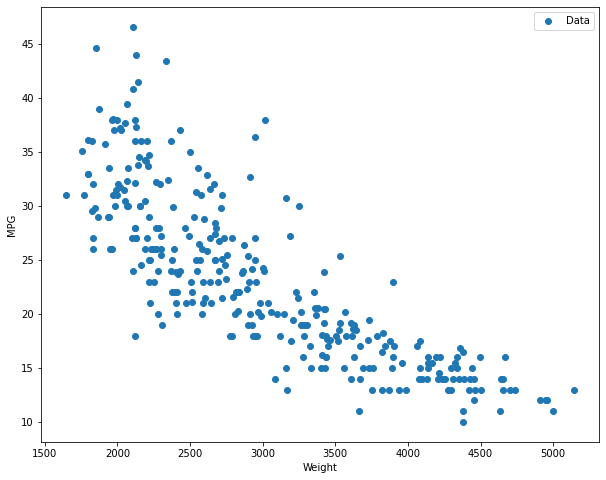

In [113]:
plot('Weight')

In [114]:
print(train_dataset.describe().transpose()[['mean', 'std']])

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
    0.197]


In [115]:
print(train_features.shape)
print(normalizer)

(314, 9)


In [116]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [117]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(314,) (314, 9)


In [118]:
# Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])

In [119]:
single_feature_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [120]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optim, loss=loss)

In [121]:
history = single_feature_model.fit(
    train_features[feature].to_numpy(), train_labels.to_numpy(),
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 23.1743 - val_loss: 22.9390
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 22.4485 - val_loss: 22.1389
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 21.4875 - val_loss: 21.3390
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 20.0806 - val_loss: 20.5392
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 20.1430 - val_loss: 19.7390
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 18.9657 - val_loss: 18.9390
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 17.8863 - val_loss: 18.1391
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 17.8661 - val_loss: 17.3389
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 16.4960 - val_loss: 16.5411
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 16.1945 - val_loss: 15.7456


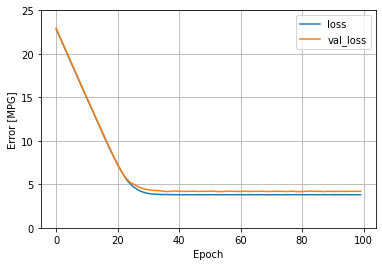

In [122]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [123]:
single_feature_model.evaluate(
    test_features[feature].to_numpy(),
    test_labels.to_numpy(), verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 3.6403


3.640312433242798

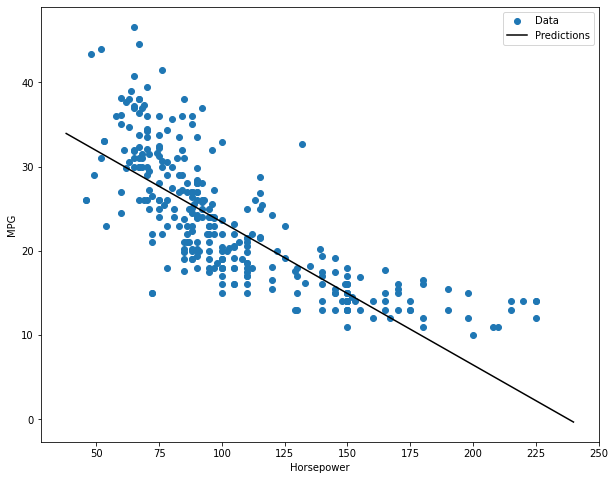

In [124]:
# predict and plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
    
plot(feature, x,y)

In [125]:
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [126]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [127]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 47ms/step - loss: 22.2957 - val_loss: 23.3568
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 22.5838 - val_loss: 23.1006
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 22.5840 - val_loss: 22.8118
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 22.1362 - val_loss: 22.4428
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 21.8412 - val_loss: 21.9745
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 21.5666 - val_loss: 21.3744
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 20.5049 - val_loss: 20.5921
Epoch 8/100
8/8 [==============================] - 0s 13ms/step - loss: 20.4242 - val_loss: 19.5888
Epoch 9/100
8/8 [==============================] - 0s 46ms/step - loss: 18.7187 - val_loss: 18.4131
Epoch 10/100
8/8 [==============================] - 0s 56ms/step - loss: 18.3729 - val_loss: 17.0696

In [128]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 2.9636


2.963604211807251

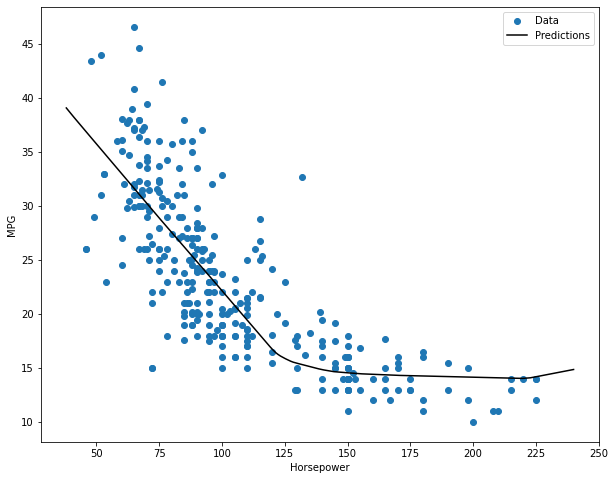

In [129]:
# predict and plot
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)

plot(feature, x,y)

In [130]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

print(linear_model.summary())

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 10        
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________
None


In [131]:

linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 22.8610 - val_loss: 23.2149
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 22.3301 - val_loss: 22.5006
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 21.7989 - val_loss: 21.7529
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 20.4550 - val_loss: 21.0184
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 20.0881 - val_loss: 20.2758
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 19.3483 - val_loss: 19.5282
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 18.0617 - val_loss: 18.7888
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 16.5391 - val_loss: 18.1042
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 16.8059 - val_loss: 17.3786
Epoch 10/100
8/8 [==============================] - 0s 11ms/step - loss: 15.9517 - val_loss: 16.6362


In [132]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 2.4519


2.451921224594116

# Part 4 CNN

In [133]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [134]:
cifar10 = keras.datasets.cifar10


In [135]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [136]:
train_images, test_images = train_images / 255, test_images / 255

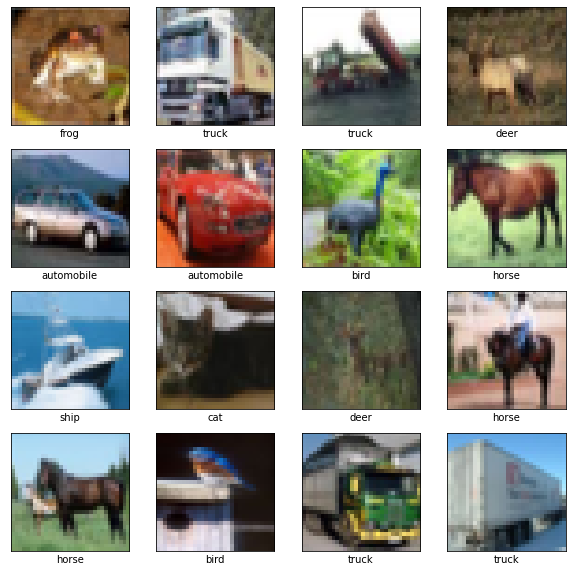

In [137]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [138]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), strides = (1,1), padding = 'valid', activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

model.compile(optimizer = optim, loss = loss, metrics = metrics)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                73792     
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [62]:
batch_size = 64
epochs = 5
model.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size, verbose = 2)

Epoch 1/5
782/782 - 13s - loss: 1.5765 - accuracy: 0.4311
Epoch 2/5
782/782 - 5s - loss: 1.2525 - accuracy: 0.5556
Epoch 3/5
782/782 - 5s - loss: 1.1352 - accuracy: 0.6028
Epoch 4/5
782/782 - 6s - loss: 1.0475 - accuracy: 0.6345
Epoch 5/5
782/782 - 4s - loss: 0.9886 - accuracy: 0.6574


In [63]:
model.evaluate(test_images, test_labels, batch_size = batch_size, verbose = 2)

157/157 - 1s - loss: 1.0215 - accuracy: 0.6411


[1.0215383768081665, 0.6410999894142151]

In [64]:
#save model
model.save('nn.h5')

#load model
model = keras.models.load_model('nn.h5')
model.evaluate(test_images, test_labels, batch_size = batch_size, verbose = 2)

157/157 - 1s - loss: 1.0215 - accuracy: 0.6411


[1.0215383768081665, 0.6410999894142151]

In [65]:
#save weight
model.save_weights('nn_weight.h5')

#load weight
model.load_weights('nn_weight.h5')

In [66]:
#json
json_string = model.to_json()

with open("nn_model.json", "w") as f:
    f.write(json_string)

with open("nn_model.json", "r") as f:
    loaded_json_string = f.read()

new_model = keras.models.model_from_json(loaded_json_string)
print(new_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                73792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

# Part 5 Functional API


In [67]:
inputs = keras.Input(shape=(28,28))

flatten = keras.layers.Flatten()
dense1 = keras.layers.Dense(128, activation='relu')
dense2 = keras.layers.Dense(10)
dense2_2 = keras.layers.Dense(1)


In [68]:
x = flatten(inputs)
x = dense1(x)
outputs1 = dense2(x)
outputs2 = dense2_2(x)

In [69]:
model = keras.Model(inputs = inputs, outputs = outputs1, name = 'functional_model')

In [70]:
model.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [71]:
mulmodel = keras.Model(inputs = inputs, outputs = [outputs1, outputs2], name = 'functional_model')

In [72]:
mulmodel.summary()

Model: "functional_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 128)          100480      flatten_2[0][0]                  
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 10)           1290        dense_9[0][0]                    
___________________________________________________________________________________

In [73]:
inputs = mulmodel.inputs
outputs = mulmodel.outputs

print(inputs)
print(outputs)

[<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_10')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_11')>]


In [74]:
input0 = mulmodel.layers[0].input
output0 = mulmodel.layers[0].output

print(input0)
print(output0)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [75]:
#transfer learning

base_model = keras.applications.VGG16()

x = base_model.layers[-2].output#son layer alınmadı
new_outputs = keras.layers.Dense(1)(x)

In [76]:
new_model = keras.Model(inputs=base_model.inputs, outputs=new_outputs)

In [77]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Part 6 Lego Minifigures Project

In [1]:
# Download 'https://www.kaggle.com/ihelon/lego-minifigures-classification' 
# Creating a 5 class marvel folder

In [4]:
import os 
import math
import random
import shutil

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
BASE_DIR = 'marvel/'
names = ['Spider-Man', 'Spider-Woman', 'Mysterio', "War Machine", "Iron Man"]

tf.random.set_seed(42)

In [6]:
if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)
        os.makedirs(BASE_DIR + 'test/' + name)

In [ ]:
#train test split
orig_folders = ["0001/", "0002/", "0003/", "0004/", "0005/"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test/" + names[folder_idx])

In [8]:
#remove orig folder
if os.path.isdir(BASE_DIR + '0001'):
    for fname in orig_folders:
        os.rmdir(BASE_DIR + fname)


In [9]:
# preprocessing_function
# rescale=1./255 -> [0,1]
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                         rotation_range=15, 
                                                         horizontal_flip=True, 
                                                         width_shift_range=0.2, 
                                                         height_shift_range=0.2, 
                                                         shear_range=0.2, 
                                                         zoom_range=0.2)
                                                         
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    'marvel/train',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'marvel/val',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'marvel/test',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 31 images belonging to 5 classes.
Found 14 images belonging to 5 classes.
Found 8 images belonging to 5 classes.


In [10]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[1. 0. 4. 1.]
(4, 256, 256, 3)
[0. 1. 2. 2.]


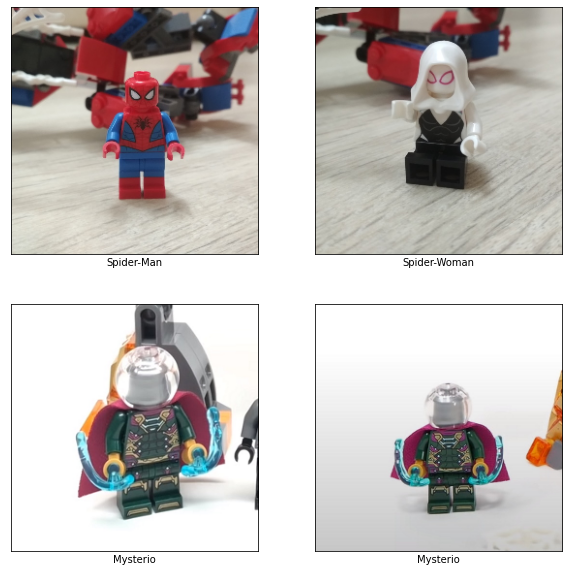

In [11]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = names[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(test_batch)

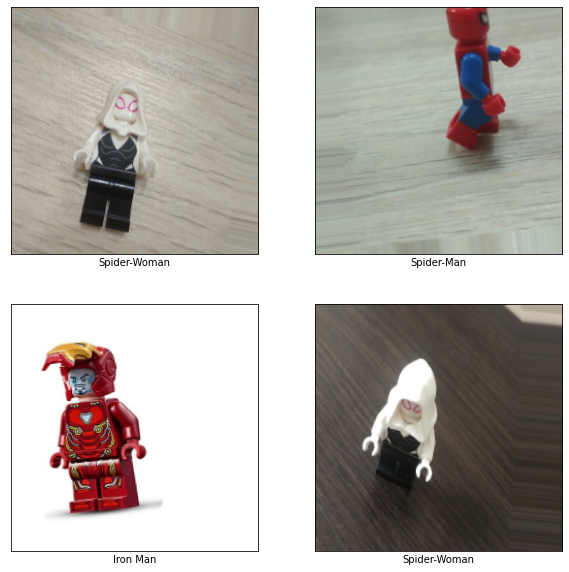

In [12]:
show(train_batch)

In [13]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), (1,1), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(5))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                15745088  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3

In [15]:
#loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr = 0.001)
metrics = ['accuracy']

model.compile(optimizer = optim, loss = loss, metrics = metrics)

In [16]:
epochs = 50

early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience=5, verbose=2)

history = model.fit(train_batches, validation_data = val_batches, epochs = epochs, verbose = 2)

Epoch 1/50
8/8 - 8s - loss: 6.0851 - accuracy: 0.1935 - val_loss: 1.6887 - val_accuracy: 0.2143
Epoch 2/50
8/8 - 1s - loss: 1.5956 - accuracy: 0.2903 - val_loss: 1.5421 - val_accuracy: 0.4286
Epoch 3/50
8/8 - 1s - loss: 1.4572 - accuracy: 0.3226 - val_loss: 1.4871 - val_accuracy: 0.4286
Epoch 4/50
8/8 - 1s - loss: 1.3957 - accuracy: 0.3226 - val_loss: 1.4765 - val_accuracy: 0.4286
Epoch 5/50
8/8 - 1s - loss: 1.2867 - accuracy: 0.4194 - val_loss: 1.4029 - val_accuracy: 0.4286
Epoch 6/50
8/8 - 1s - loss: 1.2539 - accuracy: 0.4839 - val_loss: 1.4525 - val_accuracy: 0.4286
Epoch 7/50
8/8 - 1s - loss: 1.0989 - accuracy: 0.4839 - val_loss: 1.2300 - val_accuracy: 0.5000
Epoch 8/50
8/8 - 1s - loss: 1.1533 - accuracy: 0.6774 - val_loss: 1.3328 - val_accuracy: 0.6429
Epoch 9/50
8/8 - 1s - loss: 1.1591 - accuracy: 0.5161 - val_loss: 1.1310 - val_accuracy: 0.7143
Epoch 10/50
8/8 - 1s - loss: 1.1169 - accuracy: 0.5806 - val_loss: 1.3390 - val_accuracy: 0.5714
Epoch 11/50
8/8 - 1s - loss: 1.0635 - a

In [17]:
model.save('lego.h5')

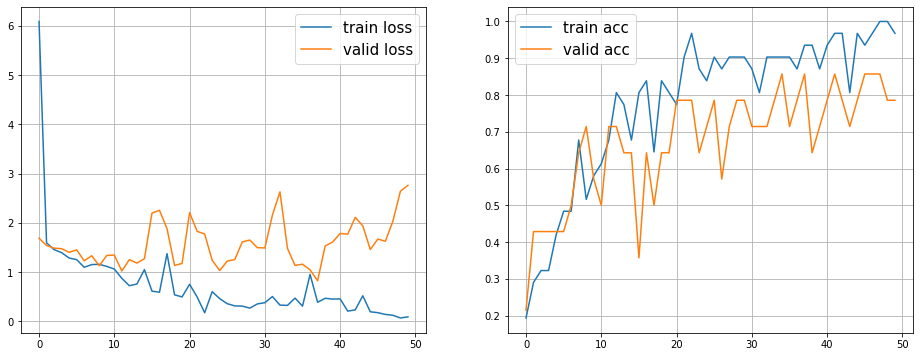

In [18]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [19]:
model.evaluate(test_batches, verbose=2)

2/2 - 0s - loss: 5.4003 - accuracy: 0.6250


[5.400266170501709, 0.625]

In [20]:
# make some predictions
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

[0. 1. 2. 2.]
[4 3 2 2]


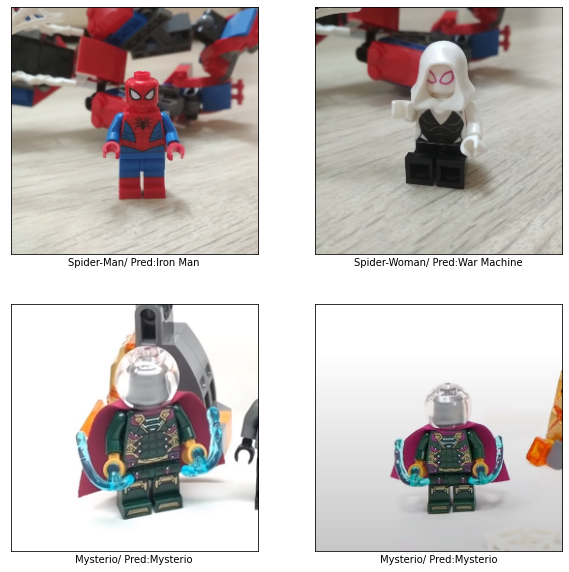

In [21]:
show(test_batches[0], labels[0:4])


# Part 7 Transfer Learning

In [22]:
vgg_model = keras.applications.vgg16.VGG16()
print(type(vgg_model))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [23]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
for layer in model.layers:#sınıflandırma katmanı harici eğitimi kapatıyoruz
    layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:
model.add(layers.Dense(5))

In [28]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [29]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [33]:
names = ['Spider-Man', 'Spider-Woman', 'Mysterio', "War Machine", "Iron Man"]

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    'marvel/train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'marvel/val',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'marvel/test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 31 images belonging to 5 classes.
Found 14 images belonging to 5 classes.
Found 8 images belonging to 5 classes.


In [34]:
epochs = 30

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

model.fit(train_batches, validation_data=val_batches,
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/30
8/8 - 10s - loss: 1.7744 - accuracy: 0.3548 - val_loss: 0.5844 - val_accuracy: 0.7857
Epoch 2/30
8/8 - 1s - loss: 0.1359 - accuracy: 1.0000 - val_loss: 0.2732 - val_accuracy: 0.9286
Epoch 3/30
8/8 - 1s - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 1.0000
Epoch 4/30
8/8 - 1s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 1.0000
Epoch 5/30
8/8 - 1s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 1.0000
Epoch 6/30
8/8 - 1s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 1.0000
Epoch 7/30
8/8 - 1s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 1.0000
Epoch 8/30
8/8 - 1s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 9/30
8/8 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 10/30
8/8 - 1s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 00010: early stopping


In [35]:
model.evaluate(test_batches, verbose=2)

2/2 - 0s - loss: 0.2364 - accuracy: 0.8750


[0.23642615973949432, 0.875]

In [36]:
# make some predictions
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

[0. 1. 2. 2.]
[0 1 2 2]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


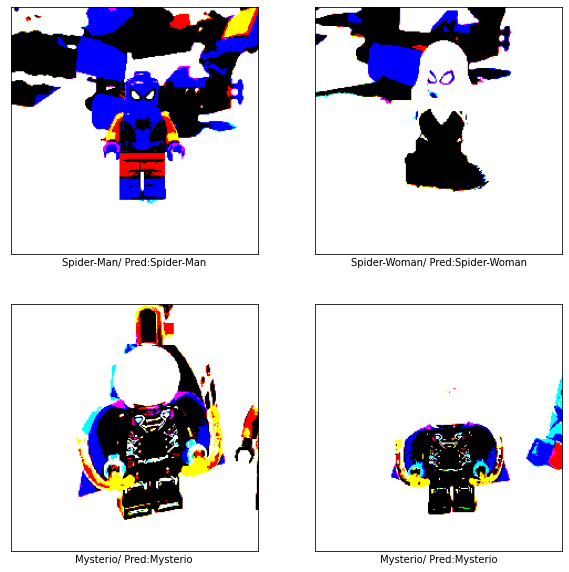

In [37]:
show(test_batches[0], labels[0:4])

# Part 8 RNN & LSTM & GRU

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28))) # seq_length, input_size
model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu')) # N, 28, 128
model.add(layers.SimpleRNN(128, return_sequences=False, activation='relu')) # N, 128
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 28, 128)           20096     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 54,282
Trainable params: 54,282
Non-trainable params: 0
_________________________________________________________________


In [7]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [8]:
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/5
938/938 - 131s - loss: 0.3486 - accuracy: 0.8888
Epoch 2/5
938/938 - 112s - loss: 0.1320 - accuracy: 0.9613
Epoch 3/5
938/938 - 113s - loss: 0.1067 - accuracy: 0.9692
Epoch 4/5
938/938 - 120s - loss: 0.0949 - accuracy: 0.9725
Epoch 5/5
938/938 - 132s - loss: 0.0859 - accuracy: 0.9753


In [9]:
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 4s - loss: 0.0695 - accuracy: 0.9804


[0.0695067048072815, 0.980400025844574]

# Part 9 NLP Text Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
# https://www.kaggle.com/c/nlp-getting-started : NLP Disaster Tweets
df = pd.read_csv("data/train.csv")
df.shape

(7613, 5)

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
print((df['target'] == 1).sum()) #Disaster
print((df['target'] == 0).sum()) #No Disaster

3271
4342


In [5]:
# Preprocessing
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#örnek 
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
t
@bbcmtd Wholesale Markets ablaze 


In [7]:
df["text"] = df.text.map(remove_URL)
df["text"] = df.text.map(remove_punct)

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tolga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df["text"] = df.text.map(remove_stopwords)

In [10]:
df['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [11]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

In [12]:
len(counter)

17971

In [13]:
counter.most_common(10)

[('like', 345),
 ('im', 299),
 ('amp', 298),
 ('fire', 250),
 ('get', 229),
 ('new', 224),
 ('via', 220),
 ('people', 196),
 ('one', 193),
 ('news', 193)]

In [14]:
num_unique_words = len(counter)

In [15]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
train_sentences = train_df['text'].to_numpy()
train_labels = train_df['target'].to_numpy()
val_sentences = val_df['text'].to_numpy()
val_labels = val_df['target'].to_numpy()

In [16]:
train_sentences.shape

(6090,)

In [17]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences)

In [18]:
word_index = tokenizer.word_index
word_index

{'like': 1,
 'amp': 2,
 'fire': 3,
 'im': 4,
 'get': 5,
 'via': 6,
 'new': 7,
 'people': 8,
 'news': 9,
 'dont': 10,
 'emergency': 11,
 'one': 12,
 '2': 13,
 'us': 14,
 'video': 15,
 'disaster': 16,
 'burning': 17,
 'body': 18,
 'would': 19,
 'buildings': 20,
 'police': 21,
 'crash': 22,
 'first': 23,
 'california': 24,
 'still': 25,
 'man': 26,
 'got': 27,
 'know': 28,
 'day': 29,
 'back': 30,
 'going': 31,
 'two': 32,
 'time': 33,
 'full': 34,
 'accident': 35,
 'see': 36,
 'world': 37,
 'attack': 38,
 'nuclear': 39,
 'youtube': 40,
 'may': 41,
 'love': 42,
 'go': 43,
 'rt': 44,
 'many': 45,
 'cant': 46,
 '3': 47,
 'watch': 48,
 'collapse': 49,
 'dead': 50,
 'today': 51,
 'car': 52,
 'mass': 53,
 'want': 54,
 'years': 55,
 'work': 56,
 'train': 57,
 'last': 58,
 'good': 59,
 'think': 60,
 'families': 61,
 'hiroshima': 62,
 'life': 63,
 'fires': 64,
 'best': 65,
 'could': 66,
 'say': 67,
 'u': 68,
 'death': 69,
 'hot': 70,
 'forest': 71,
 'way': 72,
 'killed': 73,
 'need': 74,
 'legion

In [19]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

print(train_sentences[10:15])
print(train_sequences[10:15])

['three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking']
[[520, 8, 395, 156, 297, 411], [749, 470, 2248, 138, 2249, 2813, 521, 611, 188, 470, 2248, 189, 189, 5679, 117], [2814, 117, 1884, 5680, 2248, 1285, 1450, 522, 256, 644, 2815], [99, 3742, 612, 1451, 3742], [111, 91, 336, 3743, 3744, 52, 22, 312]]


In [20]:
# Dizileri aynı uzunlukta olacak şekilde doldurun
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")


In [21]:
train_padded.shape

(6090, 20)

In [22]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

three people died heat wave far
[520, 8, 395, 156, 297, 411]
[520   8 395 156 297 411   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [23]:
#Decode için endeksleri tersine çeviren fonk yazıyoruz
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

reverse_word_index

{1: 'like',
 2: 'amp',
 3: 'fire',
 4: 'im',
 5: 'get',
 6: 'via',
 7: 'new',
 8: 'people',
 9: 'news',
 10: 'dont',
 11: 'emergency',
 12: 'one',
 13: '2',
 14: 'us',
 15: 'video',
 16: 'disaster',
 17: 'burning',
 18: 'body',
 19: 'would',
 20: 'buildings',
 21: 'police',
 22: 'crash',
 23: 'first',
 24: 'california',
 25: 'still',
 26: 'man',
 27: 'got',
 28: 'know',
 29: 'day',
 30: 'back',
 31: 'going',
 32: 'two',
 33: 'time',
 34: 'full',
 35: 'accident',
 36: 'see',
 37: 'world',
 38: 'attack',
 39: 'nuclear',
 40: 'youtube',
 41: 'may',
 42: 'love',
 43: 'go',
 44: 'rt',
 45: 'many',
 46: 'cant',
 47: '3',
 48: 'watch',
 49: 'collapse',
 50: 'dead',
 51: 'today',
 52: 'car',
 53: 'mass',
 54: 'want',
 55: 'years',
 56: 'work',
 57: 'train',
 58: 'last',
 59: 'good',
 60: 'think',
 61: 'families',
 62: 'hiroshima',
 63: 'life',
 64: 'fires',
 65: 'best',
 66: 'could',
 67: 'say',
 68: 'u',
 69: 'death',
 70: 'hot',
 71: 'forest',
 72: 'way',
 73: 'killed',
 74: 'need',
 75: 'le

In [24]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [25]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)


[520, 8, 395, 156, 297, 411]
three people died heat wave far


In [26]:
# LSTM modeli oluştur
from tensorflow.keras import layers

# Gömme: https://www.tensorflow.org/tutorials/text/word_embeddings
# Pozitif tamsayıları (dizinleri) sabit boyutta yoğun vektörlere dönüştürür. (Başka bir yaklaşım tek sıcak kodlama olabilir)

# Kelime Embeddings, benzer kelimelerin sahip olduğu verimli, yoğun bir gösterimi kullanmanın bir yolunu verir.
# benzer bir kodlama. Önemli olarak, bu kodlamayı elle belirtmeniz gerekmez. Gömme bir
# Yüzer nokta değerlerinin yoğun vektörü (Vektörin uzunluğu belirttiğiniz bir parametredir).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# Katman, boyutun bir tamsayı matrisi (toplu iş, giriş_length),
# ve girişteki en büyük tam sayı (yani kelime indeksi) NUM_WORTS'ten daha büyük olmamalıdır (kelime boyutu).
# Şimdi model.output_shape (hiçbiri, input_length, 32), burada "hiçbiri 'parti boyutu.

model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            575072    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [27]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [28]:
model.fit(train_padded, train_labels, epochs = 20, validation_data = (val_padded, val_labels), verbose = 2)

Epoch 1/20
191/191 - 24s - loss: 0.5589 - accuracy: 0.7053 - val_loss: 0.4768 - val_accuracy: 0.7761
Epoch 2/20
191/191 - 4s - loss: 0.2934 - accuracy: 0.8854 - val_loss: 0.4949 - val_accuracy: 0.7774
Epoch 3/20
191/191 - 3s - loss: 0.1586 - accuracy: 0.9456 - val_loss: 0.6592 - val_accuracy: 0.7656
Epoch 4/20
191/191 - 3s - loss: 0.1146 - accuracy: 0.9660 - val_loss: 0.6958 - val_accuracy: 0.7459
Epoch 5/20
191/191 - 2s - loss: 0.0858 - accuracy: 0.9754 - val_loss: 0.7687 - val_accuracy: 0.7400
Epoch 6/20
191/191 - 2s - loss: 0.0757 - accuracy: 0.9760 - val_loss: 0.7849 - val_accuracy: 0.7374
Epoch 7/20
191/191 - 2s - loss: 0.0676 - accuracy: 0.9782 - val_loss: 0.8028 - val_accuracy: 0.7315
Epoch 8/20
191/191 - 2s - loss: 0.0574 - accuracy: 0.9795 - val_loss: 0.9511 - val_accuracy: 0.7321
Epoch 9/20
191/191 - 3s - loss: 0.0491 - accuracy: 0.9762 - val_loss: 1.0285 - val_accuracy: 0.7328
Epoch 10/20
191/191 - 2s - loss: 0.0416 - accuracy: 0.9824 - val_loss: 1.0914 - val_accuracy: 0.732

In [30]:
predictions = model.predict(val_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [31]:
print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

['three people died heat wave far'
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding'
 'raining flooding florida tampabay tampa 18 19 days ive lost count'
 'flood bago myanmar arrived bago'
 'damage school bus 80 multi car crash breaking' 'whats man' 'love fruits'
 'summer lovely' 'car fast' 'goooooooaaaaaal']
[1 1 1 1 1 0 0 0 0 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
